### [Morphological Transformations(形态变换)](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html#morphological-ops)

。。。

## [Image Gradients（图像梯度）](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_gradients/py_gradients.html#gradients)

 cv2.Sobel(), cv2.Scharr(), cv2.Laplacian()
 

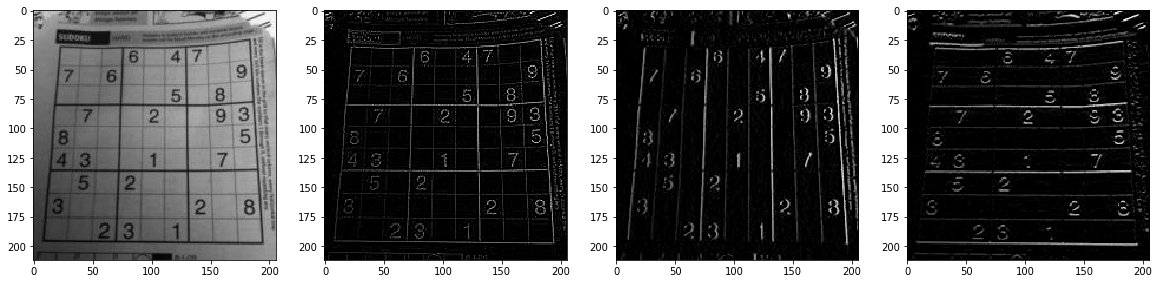

In [10]:
import sys
sys.path.append('../')
import ipynb_importer
import my_tools.tools as tools
import cv2
import numpy as np

img=cv2.imread('images/gradients.jpg',0)
laplacian = cv2.Laplacian(img,cv2.CV_8U)
sobelx = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=1)
sobely = cv2.Sobel(img,cv2.CV_8U,0,1,ksize=1)

tools.show_bgr(img,laplacian,sobelx,sobely)

#### Laplacian Derivatives的卷积核如下
![](https://docs.opencv.org/3.0-beta/_images/math/93f51b448ed781f8be0fdaacda3c6c4d3ae8e37c.png)
代码实现：

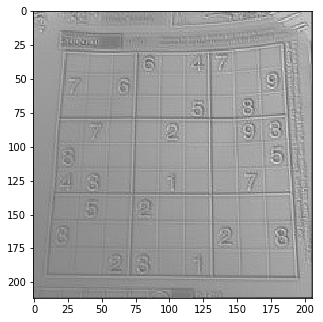

In [5]:
from scipy.signal import convolve2d
kernel=np.array([[0,1,1],[1,-4,1],[0,1,0]])

dst=convolve2d(img,kernel,mode='same')
tools.show_bgr(dst)

## One Important Matter!
In our last example, output datatype is cv2.CV_8U or np.uint8. But there is a slight(小的) problem with that. Black-to-White transition is taken as Positive slope (it has a positive value)（黑到白的梯度是正值） while White-to-Black transition is taken as a Negative slope (It has negative value)（白到黑的梯度是负值）. So when you convert data to np.uint8, all negative slopes are made zero. In simple words, you miss that edge.**（当将图片矩阵数值类型转成np.uint8的时候，负值统一替换成0，所以将丢失白到黑的边缘信息）**

If you want to detect both edges, better option is to keep the output datatype to some higher forms, like cv2.CV_16S, cv2.CV_64F etc, take its absolute value and then convert back to cv2.CV_8U**（应对办法：保存这样的数值类型cv2.CV_16S, cv2.CV_64F，取绝对值后再转成cv2.CV_8U）**. Below code demonstrates this procedure for a horizontal Sobel filter and difference in results.

样例代码如下：

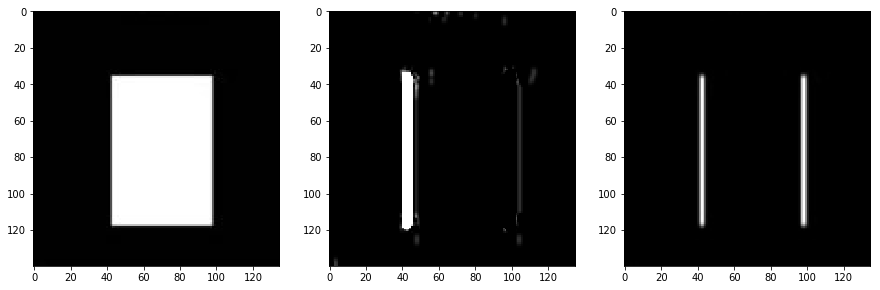

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/double_edge.jpg',0)

# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)

# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

tools.show_bgr(img,sobelx8u,abs_sobel64f)

## [Canny Edge Detection(边缘检测)](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_canny/py_canny.html#canny)

cv2.Canny()

### 理论部分：
1 边缘检测容易受到噪点的干扰，第一步 5x5高斯模糊降噪

2 求图片梯度，梯度函数表明了图片亮度信息的变化；

3 再次对照片梯度函数求导，极值点则是亮度变化最剧烈的地方，即为边缘

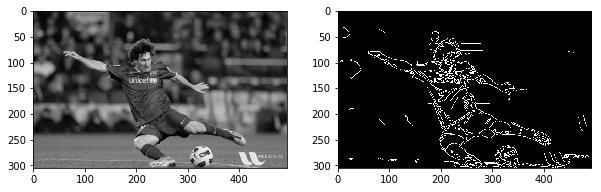

In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/messipyr.jpg',0)

#参数说明：img-处理灰度图，100-阈值低，200-阈值高
edges = cv2.Canny(img,100,200)
tools.show_bgr(img,edges)